In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle


# data_clinical_patient.txt

In [2]:
patient_file_path = "/Users/sanjuktabaruah/University_at_Buffalo/personal_project/genomic/colorectal_cancer/Colorectal_carcinoma/dataset/data_clinical_patient.txt"
patient_df = pd.read_csv(patient_file_path, delimiter="\t", header=4)
patient_df.head()

,PATIENT_ID,SEX,TUMOR_ANATOMIC_LOCATION,TUMOR_MORPHOLOGY,HISTORY_OF_CANCER,NEOADJUVANT_TREATED,ADJUVANT_TREATMENT,PATH_TUMOR_STAGE,PATH_NODES_STAGE,PATH_METASTASIS_STAGE,...,ICR_HML,CMS,TCR_PRODUCTIVE_TEMPLATES,TCR_PRODUCTIVE_REARRANGEMENTS,TCR_PRODUCTIVE_CLONALITY,IES,MICROBIOME_COHORT,MBR_SCORE,MBR_GROUP,MICROSCORE
0,SER-SILU-CC-P0002,Female,Colon Sigmoideum,Adenocarcinoma,No,No,Systemic Chemotherapy,3,1,0.0,...,ICR Low,CMS2,7076.0,5437.0,0.036,IES2,Microbiome_landmark,0.056723,High Risk,mICRoScore Low
1,SER-SILU-CC-P0004,Male,Flexura Hepatica,Mucineus Adenocarcinoma,No,No,No,4,1,0.0,...,ICR Low,mixed,NaN,NaN,NaN,NaN,ICAM42,0.070731,High Risk,NaN
2,SER-SILU-CC-P0005,Male,Colon Descendens,Adenocarcinoma,No,No,No,3,1,0.0,...,ICR High,CMS2,NaN,NaN,NaN,NaN,ICAM42,0.161886,High Risk,NaN
3,SER-SILU-CC-P0007,Female,Colon Descendens,Mucineus Adenocarcinoma,Yes,No,No,2,0,0.0,...,ICR Medium,CMS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SER-SILU-CC-P0009,Female,Colon Ascendens,Adenocarcinoma,No,No,Systemic Chemotherapy,3,2,0.0,...,ICR Medium,mixed,NaN,NaN,NaN,NaN,Microbiome_landmark,0.327006,High Risk,mICRoScore Low


In [3]:
patient_df.head(3).T

,0,1,2
PATIENT_ID,SER-SILU-CC-P0002,SER-SILU-CC-P0004,SER-SILU-CC-P0005
SEX,Female,Male,Male
TUMOR_ANATOMIC_LOCATION,Colon Sigmoideum,Flexura Hepatica,Colon Descendens
TUMOR_MORPHOLOGY,Adenocarcinoma,Mucineus Adenocarcinoma,Adenocarcinoma
HISTORY_OF_CANCER,No,No,No
NEOADJUVANT_TREATED,No,No,No
ADJUVANT_TREATMENT,Systemic Chemotherapy,No,No
PATH_TUMOR_STAGE,3,4,3
PATH_NODES_STAGE,1,1,1
PATH_METASTASIS_STAGE,0.0,0.0,0.0


In [4]:
patient_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PATH_TUMOR_STAGE,348.0,2.859195,0.648875,1.000000,3.000000,3.000000,3.000000,4.000000
PATH_NODES_STAGE,348.0,0.649425,0.787565,0.000000,0.000000,0.000000,1.000000,2.000000
PATH_METASTASIS_STAGE,325.0,0.120000,0.325463,0.000000,0.000000,0.000000,0.000000,1.000000
AJCC_PATH_STAGE,348.0,2.508621,0.958767,1.000000,2.000000,2.000000,3.000000,4.000000
CLINICAL_N_STAGE,244.0,0.278689,0.555738,0.000000,0.000000,0.000000,0.000000,2.000000
CLINICAL_M_STAGE,342.0,0.178363,0.383379,0.000000,0.000000,0.000000,0.000000,1.000000
CLINICAL_STAGE,139.0,3.000000,1.042572,1.000000,2.000000,3.000000,4.000000,4.000000
AGE_AT_DX,348.0,68.183908,11.457506,25.000000,62.000000,69.000000,76.000000,91.000000
OS_MONTHS,348.0,64.155029,45.724911,0.030000,32.390000,54.540000,86.632500,206.290000
DSS_MONTHS,320.0,64.116750,45.626036,0.030000,34.020000,54.540000,83.712500,206.290000


In [5]:
nan_count = patient_df.isnull().sum().sort_values(ascending=False)
print( nan_count)

THERAPY_METASTASIS_AT_DX         299
LOCATION_METASTASIS_AT_DX        287
CLINICAL_T_STAGE                 243
TCR_PRODUCTIVE_TEMPLATES         234
TCR_PRODUCTIVE_CLONALITY         234
TCR_PRODUCTIVE_REARRANGEMENTS    234
IES                              215
CLINICAL_STAGE                   209
CLINICAL_N_STAGE                 104
MICROSCORE                       102
MICROBIOME_COHORT                 60
MBR_SCORE                         60
MBR_GROUP                         60
DSS_MONTHS                        28
DSS_STATUS                        28
PATH_METASTASIS_STAGE             23
CLINICAL_M_STAGE                   6
HISTORY_OF_CANCER                  3
OS_MONTHS                          0
CMS                                0
ICR_HML                            0
ICRSCORE                           0
PFS_MONTHS                         0
PFS_STATUS                         0
PATIENT_ID                         0
OS_STATUS                          0
NEW_PRIMARY_TUMOR_IN_FU            0
D

#https://www.kaggle.com/discussions/questions-and-answers/397914

In [6]:
## Dropping all features that have more then 200 null values
drop_values = ['THERAPY_METASTASIS_AT_DX', 'LOCATION_METASTASIS_AT_DX', 'TCR_PRODUCTIVE_TEMPLATES', 'TCR_PRODUCTIVE_CLONALITY', 'TCR_PRODUCTIVE_REARRANGEMENTS']   
patient_df_dropped = patient_df.drop(drop_values, axis=1) 
print(patient_df_dropped)

            PATIENT_ID     SEX TUMOR_ANATOMIC_LOCATION  \
0    SER-SILU-CC-P0002  Female        Colon Sigmoideum   
1    SER-SILU-CC-P0004    Male        Flexura Hepatica   
2    SER-SILU-CC-P0005    Male        Colon Descendens   
3    SER-SILU-CC-P0007  Female        Colon Descendens   
4    SER-SILU-CC-P0009  Female         Colon Ascendens   
..                 ...     ...                     ...   
343  SER-SILU-CC-P0444    Male        Colon Sigmoideum   
344  SER-SILU-CC-P0446  Female         Rectosigmoideum   
345  SER-SILU-CC-P0450    Male         Rectosigmoideum   
346  SER-SILU-CC-P0451  Female        Colon Sigmoideum   
347  SER-SILU-CC-P0452    Male         Rectosigmoideum   

                   TUMOR_MORPHOLOGY HISTORY_OF_CANCER NEOADJUVANT_TREATED  \
0                    Adenocarcinoma                No                  No   
1           Mucineus Adenocarcinoma                No                  No   
2                    Adenocarcinoma                No                  N

In [7]:
nan_count = patient_df_dropped.isnull().sum().sort_values(ascending=False)
print(nan_count)

CLINICAL_T_STAGE              243
IES                           215
CLINICAL_STAGE                209
CLINICAL_N_STAGE              104
MICROSCORE                    102
MBR_GROUP                      60
MBR_SCORE                      60
MICROBIOME_COHORT              60
DSS_STATUS                     28
DSS_MONTHS                     28
PATH_METASTASIS_STAGE          23
CLINICAL_M_STAGE                6
HISTORY_OF_CANCER               3
PFS_STATUS                      0
OS_MONTHS                       0
ICRSCORE                        0
PFS_MONTHS                      0
NEW_PRIMARY_TUMOR_IN_FU         0
ICR_HML                         0
CMS                             0
OS_STATUS                       0
PATIENT_ID                      0
DISTANT_RECURRENCE_STATUS       0
REGIONAL_RECURRENCE_STATUS      0
SEX                             0
CAUSE_OF_DEATH                  0
VITAL_STATUS                    0
AGE_AT_DX                       0
AJCC_PATH_STAGE                 0
PATH_NODES_STA

In [8]:
patient_df_dropped.head(3).T

,0,1,2
PATIENT_ID,SER-SILU-CC-P0002,SER-SILU-CC-P0004,SER-SILU-CC-P0005
SEX,Female,Male,Male
TUMOR_ANATOMIC_LOCATION,Colon Sigmoideum,Flexura Hepatica,Colon Descendens
TUMOR_MORPHOLOGY,Adenocarcinoma,Mucineus Adenocarcinoma,Adenocarcinoma
HISTORY_OF_CANCER,No,No,No
NEOADJUVANT_TREATED,No,No,No
ADJUVANT_TREATMENT,Systemic Chemotherapy,No,No
PATH_TUMOR_STAGE,3,4,3
PATH_NODES_STAGE,1,1,1
PATH_METASTASIS_STAGE,0.0,0.0,0.0


# data_clinical_sample.txt

In [10]:
sample_file_path = "/Users/sanjuktabaruah/University_at_Buffalo/personal_project/genomic/colorectal_cancer/Colorectal_carcinoma/dataset/data_clinical_sample.txt"
sample_df = pd.read_csv(sample_file_path, delimiter="\t", header=4)
sample_df.head()

,PATIENT_ID,SAMPLE_ID,SAMPLE_TYPE,ONCOTREE_CODE,TMB_NONSYNONYMOUS,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS
0,SER-SILU-CC-P0002,SER-SILU-CC-P0002-PT-01,Primary Tumor,COAD,5.233333,Colorectal Cancer,Colon Adenocarcinoma,MATCHED
1,SER-SILU-CC-P0004,SER-SILU-CC-P0004-PT-01,Primary Tumor,COAD,NaN,Colorectal Cancer,Colon Adenocarcinoma,MATCHED
2,SER-SILU-CC-P0005,SER-SILU-CC-P0005-PT-01,Primary Tumor,COAD,NaN,Colorectal Cancer,Colon Adenocarcinoma,MATCHED
3,SER-SILU-CC-P0007,SER-SILU-CC-P0007-PT-01,Primary Tumor,COAD,2.433333,Colorectal Cancer,Colon Adenocarcinoma,MATCHED
4,SER-SILU-CC-P0009,SER-SILU-CC-P0009-PT-01,Primary Tumor,COAD,3.600000,Colorectal Cancer,Colon Adenocarcinoma,MATCHED


In [11]:
max_samples = sample_df.groupby('PATIENT_ID')['SAMPLE_ID'].nunique().max()
print("Maximum number of sample_ids for a given patient_id:", max_samples)

Maximum number of sample_ids for a given patient_id: 1


In [12]:
unique_values = sample_df.nunique()
unique_values

PATIENT_ID              348
SAMPLE_ID               348
SAMPLE_TYPE               1
ONCOTREE_CODE             1
TMB_NONSYNONYMOUS       177
CANCER_TYPE               1
CANCER_TYPE_DETAILED      1
SOMATIC_STATUS            1
dtype: int64

In [13]:
sample_drop_values = ['SAMPLE_TYPE', 'ONCOTREE_CODE', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'SOMATIC_STATUS']
sample_df_dropped = sample_df.drop(sample_drop_values, axis=1)
sample_df_dropped.head(3).T

,0,1,2
PATIENT_ID,SER-SILU-CC-P0002,SER-SILU-CC-P0004,SER-SILU-CC-P0005
SAMPLE_ID,SER-SILU-CC-P0002-PT-01,SER-SILU-CC-P0004-PT-01,SER-SILU-CC-P0005-PT-01
TMB_NONSYNONYMOUS,5.233333,NaN,NaN


# joined patient_df_dropped, sample_df_dropped dataframes

In [14]:
joined_df = pd.merge(patient_df_dropped, sample_df_dropped, on='PATIENT_ID', how = 'left')
joined_df.head(3).T

,0,1,2
PATIENT_ID,SER-SILU-CC-P0002,SER-SILU-CC-P0004,SER-SILU-CC-P0005
SEX,Female,Male,Male
TUMOR_ANATOMIC_LOCATION,Colon Sigmoideum,Flexura Hepatica,Colon Descendens
TUMOR_MORPHOLOGY,Adenocarcinoma,Mucineus Adenocarcinoma,Adenocarcinoma
HISTORY_OF_CANCER,No,No,No
NEOADJUVANT_TREATED,No,No,No
ADJUVANT_TREATMENT,Systemic Chemotherapy,No,No
PATH_TUMOR_STAGE,3,4,3
PATH_NODES_STAGE,1,1,1
PATH_METASTASIS_STAGE,0.0,0.0,0.0


In [15]:
joined_df.shape

(348, 38)

### New columns 'SAMPLE_ID' and 'TMB_NONSYNONYMOUS' are added to the data_clinical_patient dataframe. 
### TBM(Tumour Mutation Burden): Total number of mutation present in the DNA of the tumour cell.
### NONSYNONYMOUS: Mutation that result in changes to the amino acid sequence of a protein encoded by a gene.

In [16]:
nan_count = joined_df.isnull().sum().sort_values(ascending=False)
print(nan_count)

CLINICAL_T_STAGE              243
IES                           215
CLINICAL_STAGE                209
CLINICAL_N_STAGE              104
MICROSCORE                    102
TMB_NONSYNONYMOUS              67
MBR_SCORE                      60
MICROBIOME_COHORT              60
MBR_GROUP                      60
DSS_MONTHS                     28
DSS_STATUS                     28
PATH_METASTASIS_STAGE          23
CLINICAL_M_STAGE                6
HISTORY_OF_CANCER               3
CMS                             0
OS_STATUS                       0
SAMPLE_ID                       0
ICR_HML                         0
ICRSCORE                        0
PFS_MONTHS                      0
PFS_STATUS                      0
OS_MONTHS                       0
PATIENT_ID                      0
NEW_PRIMARY_TUMOR_IN_FU         0
DISTANT_RECURRENCE_STATUS       0
SEX                             0
LOCAL_RECURRENCE_STATUS         0
CAUSE_OF_DEATH                  0
VITAL_STATUS                    0
AGE_AT_DX     

Observation: Even though many clinical stages have missing information—like 243 missing for "CLINICAL_T_STAGE" and 104 missing for "CLINICAL_N_STAGE"—but when we look at all three stages together, only three patients have no clinical stage information at all.

In [17]:
# Check for rows where all three stages are null
null_stages = joined_df[joined_df['CLINICAL_N_STAGE'].isnull() & joined_df['CLINICAL_T_STAGE'].isnull() & joined_df['CLINICAL_M_STAGE'].isnull()]

# Count the number of such rows
num_null_clinical_stages = null_stages.shape[0]

null_stages_patient_id = null_stages['PATIENT_ID'].tolist()

print("Number of patients with all three stages empty:", len(null_stages_patient_id))
print("Patient IDs with all three stages empty:", null_stages_patient_id)


Number of patients with all three stages empty: 3
Patient IDs with all three stages empty: ['SER-SILU-CC-P0123', 'SER-SILU-CC-P0390', 'SER-SILU-CC-P0393']


In [18]:
# Filter rows where the data type of 'CLINICAL_T_STAGE' is object
object_type_rows = joined_df[joined_df['CLINICAL_T_STAGE'].apply(lambda x: isinstance(x, object))]

# Print the unique object values for 'CLINICAL_T_STAGE'
object_values = object_type_rows['CLINICAL_T_STAGE'].unique()
print("Object values for CLINICAL_T_STAGE:")
print(object_values)



Object values for CLINICAL_T_STAGE:
[nan '4' '3' '2' '0' '1' 'Tis']


### patient_id : SER-SILU-CC-P0246, SER-SILU-CC-P0260 and SER-SILU-CC-P0387 have CLINICAL_T_STAGE as 'tis'. Removing those with null


In [19]:
patient_id = ['SER-SILU-CC-P0246', 'SER-SILU-CC-P0260', 'SER-SILU-CC-P0387']
# locate the row to update

for i in patient_id:
    row_index = joined_df.loc[joined_df['PATIENT_ID'] == i].index[0]
    joined_df.loc[row_index, 'CLINICAL_T_STAGE'] = np.nan



In [20]:
# List of patient IDs
patient_ids_to_print = ['SER-SILU-CC-P0246', 'SER-SILU-CC-P0260', 'SER-SILU-CC-P0387']

# Filter DataFrame for the given patient IDs
filtered_df = joined_df[joined_df['PATIENT_ID'].isin(patient_ids_to_print)]

# Print only the 'CLINICAL_T_STAGE' values for the given patient IDs
print(filtered_df[['PATIENT_ID', 'CLINICAL_T_STAGE']])


            PATIENT_ID CLINICAL_T_STAGE
177  SER-SILU-CC-P0246              NaN
187  SER-SILU-CC-P0260              NaN
294  SER-SILU-CC-P0387              NaN


In [21]:
# Assuming your DataFrame is named joined_df

# Filter rows where the data type of 'CLINICAL_T_STAGE' is object
object_type_rows = joined_df[joined_df['CLINICAL_T_STAGE'].apply(lambda x: isinstance(x, object))]

# Print the unique object values for 'CLINICAL_T_STAGE'
object_values = object_type_rows['CLINICAL_T_STAGE'].unique()
print("Object values for CLINICAL_T_STAGE:")
print(object_values)

Object values for CLINICAL_T_STAGE:
[nan '4' '3' '2' '0' '1']


#### Identify how all the three stages are correlated so that we can fill the null values.

In [22]:
# Descriptive Statistics
descriptive_stats = joined_df[['CLINICAL_N_STAGE', 'CLINICAL_T_STAGE', 'CLINICAL_M_STAGE']].describe()
print(descriptive_stats)

       CLINICAL_N_STAGE  CLINICAL_M_STAGE
count        244.000000        342.000000
mean           0.278689          0.178363
std            0.555738          0.383379
min            0.000000          0.000000
25%            0.000000          0.000000
50%            0.000000          0.000000
75%            0.000000          0.000000
max            2.000000          1.000000


In [23]:
# Correlation Analysis'CLINICAL_N_STAGE', 'CLINICAL_T_STAGE', 'CLINICAL_M_STAGE'
correlation_matrix = joined_df[['CLINICAL_N_STAGE', 'CLINICAL_T_STAGE', 'CLINICAL_M_STAGE']].corr()
print(correlation_matrix)

                  CLINICAL_N_STAGE  CLINICAL_T_STAGE  CLINICAL_M_STAGE
CLINICAL_N_STAGE          1.000000          0.308667          0.191761
CLINICAL_T_STAGE          0.308667          1.000000          0.171753
CLINICAL_M_STAGE          0.191761          0.171753          1.000000


### Comparatively there is a big correlation between T and N stage
### Comparatively there is a big correlation between M(only 6 Null values) and N stage

### Clinical T Stage: This describes the size of the primary tumor and whether it has invaded nearby tissues. 

### Clinical N Stage: This indicates whether the cancer has spread to nearby lymph nodes. 

### Clinical M Stage: This indicates whether the cancer has spread to distant parts of the body, such as distant lymph nodes, organs, or tissues. M stages are represented as M0 (no distant metastasis) or M1 (distant metastasis present).

In [24]:
def count_nulls(df, features):
    null_counts = df[features].isnull().sum()
    print("Count of null values in each column:")
    print(null_counts)
    
    total_nulls_in_any_feature = df[features].isnull().any(axis=1).sum()
    print("Total count of rows with null values in any of the features:")
    print(total_nulls_in_any_feature)
    
    return null_counts

In [25]:
# Define the list of features
features_to_check = ['CLINICAL_T_STAGE', 'CLINICAL_N_STAGE', 'CLINICAL_M_STAGE']

# Call the function to get the count of null values for the specified features
null_counts = count_nulls(joined_df, features_to_check)

# Alternatively, if you want to print the total count of rows with null values in any of the features
total_nulls_in_any_feature = joined_df[features_to_check].isnull().any(axis=1).sum()

Count of null values in each column:
CLINICAL_T_STAGE    246
CLINICAL_N_STAGE    104
CLINICAL_M_STAGE      6
dtype: int64
Total count of rows with null values in any of the features:
272


### check if the null values are getting manipulated for both correlated columns

In [26]:
# Create mappings for the most common corresponding values
t_to_n_mapping = joined_df.groupby('CLINICAL_T_STAGE')['CLINICAL_N_STAGE'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
n_to_m_mapping = joined_df.groupby('CLINICAL_N_STAGE')['CLINICAL_M_STAGE'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()

# Loop through each row and fill missing values based on the mappings
for index, row in joined_df.iterrows():
    if pd.isnull(row['CLINICAL_N_STAGE']):
        joined_df.at[index, 'CLINICAL_N_STAGE'] = t_to_n_mapping.get(row['CLINICAL_T_STAGE'])
    if pd.isnull(row['CLINICAL_M_STAGE']):
        joined_df.at[index, 'CLINICAL_M_STAGE'] = n_to_m_mapping.get(joined_df.at[index, 'CLINICAL_N_STAGE'])


In [27]:
features_to_check = ['CLINICAL_T_STAGE', 'CLINICAL_N_STAGE', 'CLINICAL_M_STAGE']
null_counts = count_nulls(joined_df, features_to_check)
total_nulls_in_any_feature = joined_df[features_to_check].isnull().any(axis=1).sum()

Count of null values in each column:
CLINICAL_T_STAGE    246
CLINICAL_N_STAGE     80
CLINICAL_M_STAGE      3
dtype: int64
Total count of rows with null values in any of the features:
246


### We still have huge CLINICAL_T_STAGE null values. Thus we will remove the column and fill the pther with mode

In [28]:
joined_df['CLINICAL_N_STAGE'].fillna(joined_df['CLINICAL_N_STAGE'].mode().iloc[0], inplace=True)
joined_df['CLINICAL_M_STAGE'].fillna(joined_df['CLINICAL_M_STAGE'].mode().iloc[0], inplace=True)
joined_df.drop('CLINICAL_T_STAGE', axis=1, inplace=True)


/var/folders/65/hnv0c_w96gqfc4073czdj8_w0000gn/T/ipykernel_5242/2677558125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  joined_df['CLINICAL_N_STAGE'].fillna(joined_df['CLINICAL_N_STAGE'].mode().iloc[0], inplace=True)
/var/folders/65/hnv0c_w96gqfc4073czdj8_w0000gn/T/ipykernel_5242/2677558125.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedi

In [29]:
features_to_check = ['CLINICAL_N_STAGE', 'CLINICAL_M_STAGE']
null_counts = count_nulls(joined_df, features_to_check)
total_nulls_in_any_feature = joined_df[features_to_check].isnull().any(axis=1).sum()

Count of null values in each column:
CLINICAL_N_STAGE    0
CLINICAL_M_STAGE    0
dtype: int64
Total count of rows with null values in any of the features:
0


In [30]:
nan_count = joined_df.isnull().sum().sort_values(ascending=False)
nan_count_gt_zero = nan_count[nan_count > 0]
print("Counts of null values greater than 0:")
print(nan_count_gt_zero)


Counts of null values greater than 0:
IES                      215
CLINICAL_STAGE           209
MICROSCORE               102
TMB_NONSYNONYMOUS         67
MBR_GROUP                 60
MBR_SCORE                 60
MICROBIOME_COHORT         60
DSS_STATUS                28
DSS_MONTHS                28
PATH_METASTASIS_STAGE     23
HISTORY_OF_CANCER          3
dtype: int64


# Analyzing mutation data

In [32]:
mutation_file_path = "/Users/sanjuktabaruah/University_at_Buffalo/personal_project/genomic/colorectal_cancer/Colorectal_carcinoma/dataset/data_mutations.txt"
mutation_df = pd.read_csv(mutation_file_path, delimiter="\t")
mutation_df.head()

/var/folders/65/hnv0c_w96gqfc4073czdj8_w0000gn/T/ipykernel_5242/1464186412.py:2: DtypeWarning: Columns (102,108,110) have mixed types. Specify dtype option on import or set low_memory=False.
  mutation_df = pd.read_csv(mutation_file_path, delimiter="\t")


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,TREMBL,TSL,Tissue,UNIPARC,VARIANT_CLASS,all_effects,cDNA_position,flanking_bps,variant_id,variant_qual
0,SPTA1,6708.0,.,GRCh37,1,158653283,158653284,+,frameshift_variant,Frame_Shift_Ins,...,O60686_HUMAN,NaN,T,UPI0000458906,insertion,"SPTA1,frameshift_variant,p.Lys90GlufsTer9,ENST...",448-449/7999,TTC,.,.
1,EXOC8,149371.0,.,GRCh37,1,231471449,231471450,+,frameshift_variant,Frame_Shift_Ins,...,NaN,NaN,T,UPI000006EA2C,insertion,"EXOC8,frameshift_variant,p.Leu677PhefsTer3,ENS...",2129-2130/5099,ATA,.,.
2,TOPAZ1,375337.0,.,GRCh37,3,44285882,44285883,+,frameshift_variant,Frame_Shift_Ins,...,NaN,NaN,T,UPI000047FF75,insertion,"TOPAZ1,frameshift_variant,p.Ala632SerfsTer2,EN...",2052-2053/5334,ATA,.,.
3,FBXW12,285231.0,.,GRCh37,3,48419899,48419900,+,frameshift_variant,Frame_Shift_Ins,...,C9JK86_HUMAN,NaN,T,UPI00004123F1,insertion,"FBXW12,frameshift_variant,p.Thr169AsnfsTer44,E...",684-685/1647,GGA,.,.
4,CDKL2,8999.0,.,GRCh37,4,76539580,76539580,+,frameshift_variant,Frame_Shift_Del,...,NaN,NaN,T,UPI000006D070,deletion,"CDKL2,frameshift_variant,p.Lys74AsnfsTer5,ENST...",926/3383,CGTT,.,.


In [33]:
patient_file_path = "/Users/sanjuktabaruah/University_at_Buffalo/personal_project/genomic/colorectal_cancer/Colorectal_carcinoma/dataset/data_clinical_patient.txt"
patient_df = pd.read_csv(patient_file_path, delimiter="\t")
patient_df.head()

,#Patient Id,Sex,Tumor Anatomic Location,Tumor Morphology,History of Cancer,Neoadjuvant Treated,Adjuvant Treatment,Path Tumor Stage,Path Nodes Stage,Path Metastasis Stage,...,ICR HML,CMS,TCR Productive Templates,TCR Productive Rearrangements,TCR Productive Clonality,IES,Microbiome Cohort,MBR Score,MBR Group,mICRo Score
0,#Identification number of specific colon cance...,Sex,Anatomical location of primary tumour Values: ...,Tumor morphology as assessed by pathology depa...,Occurance of other malignancy in colon cancer ...,Treatment of colon cancer in advance of surger...,Description of treatment of colon cancer and m...,Pathologically determined tumor pt as classifi...,Pathologically determined node pn as classifie...,Pathologically determined metastasis pm as cla...,...,ICR consensus cluster of primary tumor.Values:...,Consensus Molecular Subtype of primary tumor.V...,The total number of templates directly reflect...,The total number of productive rearrangements ...,TCR clonality is calculated by normalizing the...,IES,Label for microbiome cohort as used in the ana...,Microbiome Risk Score calculated by the MBR cl...,Binarized MBR score using the cutoff threshold...,Integrated score combining ICR and MBR group. ...
1,#STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,...,STRING,STRING,NUMBER,NUMBER,NUMBER,STRING,STRING,NUMBER,STRING,STRING
2,#1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,PATIENT_ID,SEX,TUMOR_ANATOMIC_LOCATION,TUMOR_MORPHOLOGY,HISTORY_OF_CANCER,NEOADJUVANT_TREATED,ADJUVANT_TREATMENT,PATH_TUMOR_STAGE,PATH_NODES_STAGE,PATH_METASTASIS_STAGE,...,ICR_HML,CMS,TCR_PRODUCTIVE_TEMPLATES,TCR_PRODUCTIVE_REARRANGEMENTS,TCR_PRODUCTIVE_CLONALITY,IES,MICROBIOME_COHORT,MBR_SCORE,MBR_GROUP,MICROSCORE
4,SER-SILU-CC-P0002,Female,Colon Sigmoideum,Adenocarcinoma,No,No,Systemic Chemotherapy,3,1,0,...,ICR Low,CMS2,7076,5437,0.036,IES2,Microbiome_landmark,0.056722945,High Risk,mICRoScore Low


In [34]:
print(mutation_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140127 entries, 0 to 140126
Columns: 127 entries, Hugo_Symbol to variant_qual
dtypes: float64(38), int64(10), object(79)
memory usage: 135.8+ MB
None


In [35]:
joined_df.shape

(348, 37)

### Calculating Mutation_Count against each Tumor_Sample_Barcode or SAMPLE_ID

In [36]:
mutation_df = mutation_df[["Hugo_Symbol", "Tumor_Sample_Barcode"]]

# Group by sample_id and aggregate mutations into a comma-separated string
grouped = mutation_df.groupby('Tumor_Sample_Barcode')


mutation_df = grouped.agg(
    Mutation_Count=('Hugo_Symbol', 'count'),           # Define the name for the mutation count column
    Mutations=('Hugo_Symbol', lambda x: ', '.join(x))  # Define the name for the aggregated mutation column
).reset_index()

mutation_df.head()

,Tumor_Sample_Barcode,Mutation_Count,Mutations
0,SER-SILU-CC-P0002-PT-01,158,"APC, BTNL8, MYLK4, GLP1R, LATS1, TP53, KRT35, ..."
1,SER-SILU-CC-P0007-PT-01,74,"C8orf88, DCN, EP400, SMAD4, CENPB, INSL5, TNNI..."
2,SER-SILU-CC-P0009-PT-01,113,"TLE1, WDR72, PLXNB3, PRKCZ, PAX7, ZBTB8OS, LPH..."
3,SER-SILU-CC-P0010-PT-01,73,"ASH1L, ATR, APC, CUBN, TP53, CHD5, AGO3, SLFNL..."
4,SER-SILU-CC-P0019-PT-01,78,"HS6ST1, CENPU, GCNT4, APC, PSME1, PAX1, H6PD, ..."


In [37]:
mutation_df.rename(columns={"Tumor_Sample_Barcode":"SAMPLE_ID"}, inplace = True)
mutation_df.head()

,SAMPLE_ID,Mutation_Count,Mutations
0,SER-SILU-CC-P0002-PT-01,158,"APC, BTNL8, MYLK4, GLP1R, LATS1, TP53, KRT35, ..."
1,SER-SILU-CC-P0007-PT-01,74,"C8orf88, DCN, EP400, SMAD4, CENPB, INSL5, TNNI..."
2,SER-SILU-CC-P0009-PT-01,113,"TLE1, WDR72, PLXNB3, PRKCZ, PAX7, ZBTB8OS, LPH..."
3,SER-SILU-CC-P0010-PT-01,73,"ASH1L, ATR, APC, CUBN, TP53, CHD5, AGO3, SLFNL..."
4,SER-SILU-CC-P0019-PT-01,78,"HS6ST1, CENPU, GCNT4, APC, PSME1, PAX1, H6PD, ..."


In [38]:
mutation_df.to_csv('mutations_summary.csv', index=False)

## Joining the joined_df (patient + sample) with mutation_df (mutation) and formng joined_mutation_df

In [39]:
joined_mutation_df = pd.merge(joined_df, mutation_df, on='SAMPLE_ID', how = 'left')
joined_mutation_df.head(3).T

,0,1,2
PATIENT_ID,SER-SILU-CC-P0002,SER-SILU-CC-P0004,SER-SILU-CC-P0005
SEX,Female,Male,Male
TUMOR_ANATOMIC_LOCATION,Colon Sigmoideum,Flexura Hepatica,Colon Descendens
TUMOR_MORPHOLOGY,Adenocarcinoma,Mucineus Adenocarcinoma,Adenocarcinoma
HISTORY_OF_CANCER,No,No,No
NEOADJUVANT_TREATED,No,No,No
ADJUVANT_TREATMENT,Systemic Chemotherapy,No,No
PATH_TUMOR_STAGE,3,4,3
PATH_NODES_STAGE,1,1,1
PATH_METASTASIS_STAGE,0.0,0.0,0.0


In [40]:
joined_mutation_df.shape

(348, 39)

## Analysis of min, max, mean values when MICROSCORE = 'mICRoScore High' or 'mICRoScore Low'

In [41]:
filtered_dataframe = joined_mutation_df[joined_mutation_df['MICROSCORE'] =='mICRoScore High']
min_mutation_count = filtered_dataframe['Mutation_Count'].min()
max_mutation_count = filtered_dataframe['Mutation_Count'].max()

sorted_filtered_dataframe = filtered_dataframe.sort_values(by='Mutation_Count')
print(sorted_filtered_dataframe[['MICROSCORE', 'Mutation_Count']].describe())

print("Minimum value of Mutation_Count when MICROSCORE is mICRoScore High:", min_mutation_count)
print("Maximum value of Mutation_Count when MICROSCORE is mICRoScore High:", max_mutation_count)

microscore_high_df = sorted_filtered_dataframe[sorted_filtered_dataframe['MICROSCORE'] == 'mICRoScore High']


       Mutation_Count
count       33.000000
mean       958.181818
std       1325.137480
min         54.000000
25%        102.000000
50%        799.000000
75%       1331.000000
max       7307.000000
Minimum value of Mutation_Count when MICROSCORE is mICRoScore High: 54.0
Maximum value of Mutation_Count when MICROSCORE is mICRoScore High: 7307.0


In [42]:
filtered_dataframe = joined_mutation_df[joined_mutation_df['MICROSCORE'] =='mICRoScore Low']
max_mutation_count = filtered_dataframe['Mutation_Count'].max()
min_mutation_count = filtered_dataframe['Mutation_Count'].min()

sorted_filtered_dataframe_desc = filtered_dataframe.sort_values(by='Mutation_Count', ascending=False)
print(sorted_filtered_dataframe_desc[['MICROSCORE', 'Mutation_Count']].describe())

print("Maximum value of Mutation_Count when MICROSCORE is mICRoScore Low:", max_mutation_count)
print("Minimum value of Mutation_Count when MICROSCORE is mICRoScore Low:", min_mutation_count)

summary_stats = sorted_filtered_dataframe_desc.describe()



       Mutation_Count
count      213.000000
mean       444.892019
std        936.431082
min          3.000000
25%         88.000000
50%        116.000000
75%        184.000000
max       8738.000000
Maximum value of Mutation_Count when MICROSCORE is mICRoScore Low: 8738.0
Minimum value of Mutation_Count when MICROSCORE is mICRoScore Low: 3.0


### filtered_df is a dataframe that contains only the not_null values of 'MICROSCORE' and 'mutation_count'

In [43]:
filtered_df = joined_mutation_df[(joined_mutation_df['MICROSCORE'].notnull()) & (joined_mutation_df['Mutation_Count'].notnull())]
# print(filtered_df[['MICROSCORE', 'Mutation_Count']])

filtered_df[['MICROSCORE', 'Mutation_Count']]


,MICROSCORE,Mutation_Count
0,mICRoScore Low,158.0
4,mICRoScore Low,113.0
5,mICRoScore Low,73.0
12,mICRoScore Low,22.0
14,mICRoScore Low,147.0
...,...,...
342,mICRoScore Low,249.0
343,mICRoScore High,102.0
344,mICRoScore Low,101.0
346,mICRoScore High,1310.0


### Label encodeing filtered_df['MICROSCORE']  and finding correlation between ['MICROSCORE', 'Mutation_Count']

In [44]:
# Replace 'Microscore low' with 0 and 'Microscore high' with 1 in the 'MICROSCORE' column
filtered_df['MICROSCORE'] = filtered_df['MICROSCORE'].replace({'mICRoScore Low': 0, 'mICRoScore High': 1})

# Calculate the correlation between the 'MICROSCORE' and 'Mutation_Count' columns
correlation_matrix = filtered_df[['MICROSCORE', 'Mutation_Count']].corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                MICROSCORE  Mutation_Count
MICROSCORE         1.00000         0.17366
Mutation_Count     0.17366         1.00000


/var/folders/65/hnv0c_w96gqfc4073czdj8_w0000gn/T/ipykernel_5242/2221135814.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_df['MICROSCORE'] = filtered_df['MICROSCORE'].replace({'mICRoScore Low': 0, 'mICRoScore High': 1})
/var/folders/65/hnv0c_w96gqfc4073czdj8_w0000gn/T/ipykernel_5242/2221135814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MICROSCORE'] = filtered_df['MICROSCORE'].replace({'mICRoScore Low': 0, 'mICRoScore High': 1})


### One Hot Encoding encodeing filtered_df['MICROSCORE']  and finding correlation between ['MICROSCORE', 'Mutation_Count']

In [45]:
filtered_df_on_hot = filtered_df.copy()
# Perform one-hot encoding on 'MICROSCORE'
one_hot_encoded = pd.get_dummies(filtered_df_on_hot['MICROSCORE'], prefix='MICROSCORE')

# Concatenate the one-hot encoded columns to the original DataFrame
filtered_df_on_hot = pd.concat([filtered_df_on_hot, one_hot_encoded], axis=1)

# Drop the original 'MICROSCORE' column
filtered_df_on_hot = filtered_df_on_hot.drop(columns=['MICROSCORE'])


In [46]:
microscore_columns = [col for col in filtered_df_on_hot.columns if col.startswith('MICROSCORE')]

# Print the column names
print("Columns containing 'MICROSCORE':")
print(microscore_columns)

Columns containing 'MICROSCORE':
['MICROSCORE_0', 'MICROSCORE_1']


In [47]:
# Calculate the correlation between the 'MICROSCORE' and 'Mutation_Count' columns
correlation_matrix = filtered_df_on_hot[['MICROSCORE_0', 'MICROSCORE_1', 'Mutation_Count']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                MICROSCORE_0  MICROSCORE_1  Mutation_Count
MICROSCORE_0         1.00000      -1.00000        -0.17366
MICROSCORE_1        -1.00000       1.00000         0.17366
Mutation_Count      -0.17366       0.17366         1.00000


In [48]:
# Define the list of features
features_to_check = ['MICROSCORE', 'Mutation_Count']

# Call the function to get the count of null values for the specified features
null_counts = count_nulls(joined_mutation_df, features_to_check)

# Alternatively, if you want to print the total count of rows with null values in any of the features
total_nulls_in_any_feature = joined_mutation_df[features_to_check].isnull().any(axis=1).sum()

Count of null values in each column:
MICROSCORE        102
Mutation_Count     67
dtype: int64
Total count of rows with null values in any of the features:
102


In [49]:
joined_mutation_df['Mutation_Count'].head(3)

0    158.0
1      NaN
2      NaN
Name: Mutation_Count, dtype: float64

### Since the correlation of label encoding is better, we are proceeding with that

In [50]:
# Replace 'Microscore low' with 0 and 'Microscore high' with 1 in the 'MICROSCORE' column
joined_mutation_df['MICROSCORE'] = joined_mutation_df['MICROSCORE'].replace({'mICRoScore Low': 0, 'mICRoScore High': 1})

/var/folders/65/hnv0c_w96gqfc4073czdj8_w0000gn/T/ipykernel_5242/914638745.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  joined_mutation_df['MICROSCORE'] = joined_mutation_df['MICROSCORE'].replace({'mICRoScore Low': 0, 'mICRoScore High': 1})


In [51]:
# Calculate the count of rows where 'MICROSCORE' is not null and 'Mutation_Count' is null
microscore_with_null_mutation_count_count = joined_mutation_df['MICROSCORE'].notnull() & joined_mutation_df['Mutation_Count'].isnull()

# Calculate the count of rows where 'Mutation_Count' is not null and 'MICROSCORE' is null
mutation_count_with_null_microscore_count = joined_mutation_df['Mutation_Count'].notnull() & joined_mutation_df['MICROSCORE'].isnull()

print("Count of rows with 'MICROSCORE' value for a null 'Mutation_Count':", microscore_with_null_mutation_count_count.sum())
print("Count of rows with 'Mutation_Count' value for a null 'MICROSCORE':", mutation_count_with_null_microscore_count.sum())



Count of rows with 'MICROSCORE' value for a null 'Mutation_Count': 0
Count of rows with 'Mutation_Count' value for a null 'MICROSCORE': 35


### Code Explanation

This code is designed to fill missing values in a DataFrame based on mappings between two columns: 'MICROSCORE' and 'Mutation_Count'. Here's a breakdown:

1. **Creating Mappings:** 
   - Two dictionaries are created (`Microscore_to_mutation_count` and `mutation_count_to_Microscore`) that map values between 'MICROSCORE' and 'Mutation_Count' based on the most common corresponding values in the DataFrame.

2. **Initializing Counter:** 
   - `num_changes` is initialized to track the number of changes made.

3. **Looping Through Rows:**
   - For each row in the DataFrame:
     - If 'MICROSCORE' is missing, it fills it based on the corresponding 'Mutation_Count' value using `mutation_count_to_Microscore`.
     - If 'Mutation_Count' is missing, it fills it based on the corresponding 'MICROSCORE' value using `Microscore_to_mutation_count`.
     - If a fill occurs and changes the original value, it increments `num_changes`.

4. **Printing Results:**
   - The total number of changes made (`num_changes`) is printed.

### Example

Let's illustrate with a simple DataFrame:

| MICROSCORE | Mutation_Count |
|------------|----------------|
|    3       |       10       |
|    NaN     |       20       |
|    4       |       NaN      |
|    2       |       15       |
|    NaN     |       15       |

This DataFrame has missing values. The code fills these missing values based on the mappings created.

After running the code, it will output the number of changes made.


In [52]:
# Create mappings for the most common corresponding values
Microscore_to_mutation_count = joined_mutation_df.groupby('MICROSCORE')['Mutation_Count'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
mutation_count_to_Microscore = joined_mutation_df.groupby('Mutation_Count')['MICROSCORE'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()

# Initialize a counter to keep track of the number of changes made
num_changes = 0

# Loop through each row and fill missing values based on the mappings
for index, row in joined_mutation_df.iterrows():
    if pd.isnull(row['MICROSCORE']):
        original_value = row['MICROSCORE']
        corresponding_mutation_count = row['Mutation_Count']
        if corresponding_mutation_count in mutation_count_to_Microscore:
            joined_mutation_df.at[index, 'MICROSCORE'] = mutation_count_to_Microscore[corresponding_mutation_count]
            if original_value != joined_mutation_df.at[index, 'MICROSCORE']:
                num_changes += 1
    if pd.isnull(row['Mutation_Count']):
        original_value = row['Mutation_Count']
        corresponding_microscore = row['MICROSCORE']
        if corresponding_microscore in Microscore_to_mutation_count:
            joined_mutation_df.at[index, 'Mutation_Count'] = Microscore_to_mutation_count[corresponding_microscore]
            if original_value != joined_mutation_df.at[index, 'Mutation_Count']:
                num_changes += 1

print("Number of changes made:", num_changes)


Number of changes made: 35


## Count of observations with null values in both 'MICROSCORE' and 'Mutation_Count'


In [53]:
# Initialize a counter to keep track of observations with null values in both columns
both_null_count = 0

# Loop through each row and fill missing values based on the mappings
for index, row in joined_mutation_df.iterrows():
    if pd.isnull(row['MICROSCORE']) and pd.isnull(row['Mutation_Count']):
        both_null_count += 1

print("Count of observations with null values in both 'MICROSCORE' and 'Mutation_Count':", both_null_count)

Count of observations with null values in both 'MICROSCORE' and 'Mutation_Count': 67


In [54]:
null_count_a = joined_mutation_df['MICROSCORE'].isnull().sum()
null_count_b = joined_mutation_df['Mutation_Count'].isnull().sum()

print("Count of null values in column 'MICROSCORE':", null_count_a)
print("Count of null values in column 'Mutation_Count':", null_count_b)

Count of null values in column 'MICROSCORE': 81
Count of null values in column 'Mutation_Count': 67


In [55]:
features_to_check = ['MICROSCORE', 'Mutation_Count']
null_counts = count_nulls(joined_mutation_df, features_to_check)
total_nulls_in_any_feature = joined_mutation_df[features_to_check].isnull().any(axis=1).sum()

Count of null values in each column:
MICROSCORE        81
Mutation_Count    67
dtype: int64
Total count of rows with null values in any of the features:
81


## Analysing all null values left after these manipulation

In [56]:
nan_count = joined_mutation_df.isnull().sum().sort_values(ascending=False)
print( nan_count)

IES                           215
CLINICAL_STAGE                209
MICROSCORE                     81
Mutations                      67
Mutation_Count                 67
TMB_NONSYNONYMOUS              67
MBR_SCORE                      60
MICROBIOME_COHORT              60
MBR_GROUP                      60
DSS_MONTHS                     28
DSS_STATUS                     28
PATH_METASTASIS_STAGE          23
HISTORY_OF_CANCER               3
OS_STATUS                       0
SAMPLE_ID                       0
CMS                             0
ICR_HML                         0
ICRSCORE                        0
PFS_MONTHS                      0
PFS_STATUS                      0
OS_MONTHS                       0
PATIENT_ID                      0
NEW_PRIMARY_TUMOR_IN_FU         0
AJCC_PATH_STAGE                 0
TUMOR_ANATOMIC_LOCATION         0
TUMOR_MORPHOLOGY                0
NEOADJUVANT_TREATED             0
ADJUVANT_TREATMENT              0
PATH_TUMOR_STAGE                0
PATH_NODES_STA

## Analysing all categorical features with their corresponding unique values

In [57]:
object_columns = joined_mutation_df.select_dtypes(include=['object'])

# Iterate through the object columns and print column names and unique values
for column in object_columns.columns:
    unique_values = joined_mutation_df[column].nunique()
    print(f"Column: {column}, Unique Values: {unique_values}")

Column: PATIENT_ID, Unique Values: 348
Column: SEX, Unique Values: 2
Column: TUMOR_ANATOMIC_LOCATION, Unique Values: 8
Column: TUMOR_MORPHOLOGY, Unique Values: 7
Column: HISTORY_OF_CANCER, Unique Values: 2
Column: NEOADJUVANT_TREATED, Unique Values: 1
Column: ADJUVANT_TREATMENT, Unique Values: 11
Column: VITAL_STATUS, Unique Values: 2
Column: CAUSE_OF_DEATH, Unique Values: 24
Column: LOCAL_RECURRENCE_STATUS, Unique Values: 2
Column: REGIONAL_RECURRENCE_STATUS, Unique Values: 2
Column: DISTANT_RECURRENCE_STATUS, Unique Values: 2
Column: NEW_PRIMARY_TUMOR_IN_FU, Unique Values: 3
Column: OS_STATUS, Unique Values: 2
Column: DSS_STATUS, Unique Values: 2
Column: PFS_STATUS, Unique Values: 2
Column: ICR_HML, Unique Values: 3
Column: CMS, Unique Values: 5
Column: IES, Unique Values: 4
Column: MICROBIOME_COHORT, Unique Values: 2
Column: MBR_GROUP, Unique Values: 2
Column: SAMPLE_ID, Unique Values: 348
Column: Mutations, Unique Values: 281


In [58]:
joined_mutation_df.shape

(348, 39)

In [59]:

# Define columns to exclude
exclude_columns = ['PATIENT_ID', 'SAMPLE_ID', 'Mutations']

# Select all columns except the excluded ones
columns_to_check = object_columns.columns.difference(exclude_columns)

# Iterate through the sorted DataFrame and print column names and unique values
for column in columns_to_check:
    unique_values = joined_mutation_df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

Column: ADJUVANT_TREATMENT, Unique Values: ['Systemic Chemotherapy' 'No'
 'Targeted Chemo Mab, Chemotherapy Incl. Platinum'
 'Chemotherapy Incl. Platinum'
 'Chemotherapy Incl. Platinum, Targeted Chemo Mab'
 'Chemotherapy Incl. Platinum, Targeted Chemo Mab, Systemic Chemotherapy'
 'Radiotherapy' 'Chemotherapy With Levamisol/Leucovorin/Ledervorin'
 'Chemotherapy Incl. Platinum, Systemic Chemotherapy' 'Chemotherapy Nno'
 'Systemic Chemotherapy, Chemotherapy Incl. Platinum']
Column: CAUSE_OF_DEATH, Unique Values: ['Colon Cancer' 'Not Cancer-Related' 'Alive' 'Respiratory Disease'
 'Unknown Cause' 'Multiple Malignancies' 'Non-Hodgkin Lymphoma'
 'Cardiovascular Disease' 'Myeloid Leukemia'
 'Disease Of Genitourinary System' 'Accident' 'Cns-Related Illness'
 'Labia Cancer' 'Lung Cancer' 'Esophagus Cancer' 'Pancreatic Tumor'
 'Disease Of Digestive System' 'Mesothelioma' 'Malignant Brain Tumor'
 'Infection' 'Uterine Cancer' 'Ovary Cancer' 'Rectal Cancer'
 'Bladder Cancer']
Column: CMS, Unique Val

## Encoding 'PATIENT_ID' values in joined_mutation_df as 1, 2, ..

In [60]:
joined_mutation_df['PATIENT_ID'] = range(len(joined_mutation_df))

In [61]:
joined_mutation_df['PATIENT_ID'].head(3)

0    0
1    1
2    2
Name: PATIENT_ID, dtype: int64

## joined_mutation_df = Main dataframe 
## new_df = joined_mutation_df - [ 'SAMPLE_ID', 'Mutations']

In [62]:
# List of columns to exclude
exclude_columns = ['SAMPLE_ID', 'Mutations']

# List of object columns
object_columns = joined_mutation_df.select_dtypes(include=['object']).columns

# Creating a new DataFrame with columns that are object type and not in the exclude list
new_df = joined_mutation_df[[col for col in joined_mutation_df.columns if col in object_columns and col not in exclude_columns]]

# Display the resulting DataFrame
new_df.head()


,SEX,TUMOR_ANATOMIC_LOCATION,TUMOR_MORPHOLOGY,HISTORY_OF_CANCER,NEOADJUVANT_TREATED,ADJUVANT_TREATMENT,VITAL_STATUS,CAUSE_OF_DEATH,LOCAL_RECURRENCE_STATUS,REGIONAL_RECURRENCE_STATUS,DISTANT_RECURRENCE_STATUS,NEW_PRIMARY_TUMOR_IN_FU,OS_STATUS,DSS_STATUS,PFS_STATUS,ICR_HML,CMS,IES,MICROBIOME_COHORT,MBR_GROUP
0,Female,Colon Sigmoideum,Adenocarcinoma,No,No,Systemic Chemotherapy,Dead,Colon Cancer,No,No,Yes,No,1:DECEASED,1:DEAD,1:Recurred,ICR Low,CMS2,IES2,Microbiome_landmark,High Risk
1,Male,Flexura Hepatica,Mucineus Adenocarcinoma,No,No,No,Dead,Colon Cancer,No,Yes,Yes,No,1:DECEASED,1:DEAD,1:Recurred,ICR Low,mixed,NaN,ICAM42,High Risk
2,Male,Colon Descendens,Adenocarcinoma,No,No,No,Dead,Not Cancer-Related,No,No,No,No,1:DECEASED,0:ALIVE,0:DiseaseFree,ICR High,CMS2,NaN,ICAM42,High Risk
3,Female,Colon Descendens,Mucineus Adenocarcinoma,Yes,No,No,Alive,Alive,No,No,No,No,0:LIVING,0:ALIVE,0:DiseaseFree,ICR Medium,CMS3,NaN,NaN,NaN
4,Female,Colon Ascendens,Adenocarcinoma,No,No,Systemic Chemotherapy,Dead,Colon Cancer,Yes,Yes,Yes,No,1:DECEASED,1:DEAD,1:Recurred,ICR Medium,mixed,NaN,Microbiome_landmark,High Risk


In [63]:
new_df.shape

(348, 20)

In [64]:
new_df.isnull().sum().sum()

366

In [65]:
# Get a series with the count of null values for each column
null_counts = new_df.isnull().sum()

# Filter out columns with no null values
columns_with_nulls = null_counts[null_counts > 0]

# Create a DataFrame with the count of null values and their data types
null_columns_info = pd.DataFrame({
    'Null Count': columns_with_nulls,
    'Data Type': new_df[columns_with_nulls.index].dtypes
})

# Display the DataFrame
null_columns_info



,Null Count,Data Type
HISTORY_OF_CANCER,3,object
DSS_STATUS,28,object
IES,215,object
MICROBIOME_COHORT,60,object
MBR_GROUP,60,object


In [66]:
new_df.drop("IES", axis = 1, inplace = True)

/var/folders/65/hnv0c_w96gqfc4073czdj8_w0000gn/T/ipykernel_5242/1638376810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop("IES", axis = 1, inplace = True)


In [67]:
null_values = new_df.columns[new_df.isnull().any().tolist()]
print(null_values)

Index(['HISTORY_OF_CANCER', 'DSS_STATUS', 'MICROBIOME_COHORT', 'MBR_GROUP'], dtype='object')


In [68]:
for column in null_values:
    mode_value = new_df[column].mode()[0]
    new_df[column].fillna(mode_value, inplace=True)

/var/folders/65/hnv0c_w96gqfc4073czdj8_w0000gn/T/ipykernel_5242/8587044.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df[column].fillna(mode_value, inplace=True)
/var/folders/65/hnv0c_w96gqfc4073czdj8_w0000gn/T/ipykernel_5242/8587044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column].fillna(mode_value, inplace=True)


In [69]:
nulls = new_df.columns[new_df.isnull().any().tolist()]
print(nulls)

Index([], dtype='object')


### Identify Label encoding columns and One-hot encoding (manually: requires SME input)

In [70]:
for col in new_df.columns:
    print("*"*25)
    print(f"{col} : [ {', '.join(new_df[col].unique())} ]\n")
    

*************************
SEX : [ Female, Male ]

*************************
TUMOR_ANATOMIC_LOCATION : [ Colon Sigmoideum, Flexura Hepatica, Colon Descendens, Colon Ascendens, Ceceum, Colon Transversum, Rectosigmoideum, Flexura Lienalis ]

*************************
TUMOR_MORPHOLOGY : [ Adenocarcinoma, Mucineus Adenocarcinoma, Adenocarcinoma Intestinal Type, Cribriform Carcinoma, Signet Ring Cell Carcinoma, Adenocarcinoma In Villeus Adenoma, Adenocarcinoma With Mixed Subtypes ]

*************************
HISTORY_OF_CANCER : [ No, Yes ]

*************************
NEOADJUVANT_TREATED : [ No ]

*************************
ADJUVANT_TREATMENT : [ Systemic Chemotherapy, No, Targeted Chemo Mab, Chemotherapy Incl. Platinum, Chemotherapy Incl. Platinum, Chemotherapy Incl. Platinum, Targeted Chemo Mab, Chemotherapy Incl. Platinum, Targeted Chemo Mab, Systemic Chemotherapy, Radiotherapy, Chemotherapy With Levamisol/Leucovorin/Ledervorin, Chemotherapy Incl. Platinum, Systemic Chemotherapy, Chemotherap

In [71]:
label_features = ['SEX', 'HISTORY_OF_CANCER', 'VITAL_STATUS', 'OS_STATUS', 'DSS_STATUS', 'ICR_HML', 'MBR_GROUP', 'MICROBIOME_COHORT'] 
# Here we have not considered 'LOCAL_RECURRENCE_STATUS', 'REGIONAL_RECURRENCE_STATUS', 'DISTANT_RECURRENCE_STATUS', 'PFS_STATUS' because of of later dependence.


drop_features = ['NEOADJUVANT_TREATED']

In [72]:
new_df = new_df.drop(columns=drop_features)

## performing one hot encoding on new_df and label encoding on 'ICR_HML'

In [73]:
def encode_one_hot_features(df, one_hot_features):
    # Create a copy of the dataframe to avoid modifying the original data
    encoded_data = df.copy()
    
    if len(one_hot_features) > 0:
        # One-hot encode specified features using pd.get_dummies
        for col in one_hot_features:
            one_hot_encoded = pd.get_dummies(encoded_data[col], prefix=col)
            encoded_data = pd.concat([encoded_data, one_hot_encoded], axis=1)
            encoded_data = encoded_data.drop(col, axis=1)

    return encoded_data

def encode_label_feature(df, label_features, custom_map=None):
    encoded_data = df.copy()
    w2i_inv_map = {}

    if len(label_features) > 0:
        for feature in label_features:
            if custom_map and feature in custom_map:
                 encoded_data[feature] = df[feature].map(custom_map[feature])
                 w2i_inv_map[feature] = custom_map[feature]
                 continue

            label_encoder = LabelEncoder()
            encoded_data[feature] = label_encoder.fit_transform(encoded_data[feature])
            
            w2i_inv_map[feature] = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
    return encoded_data, w2i_inv_map


one_hot_features = [col for col in new_df.columns if col not in label_features]

encoded_df = new_df.copy(deep=True)
encoded_df = encode_one_hot_features(encoded_df, one_hot_features)

custom_label_mapping = {'ICR_HML':{'ICR Low': 0, 'ICR Medium': 1, 'ICR High': 2}}
encoded_df, w2i_inv_map = encode_label_feature(encoded_df, label_features, custom_map=custom_label_mapping)
encoded_df.head(3).T

,0,1,2
SEX,0,1,1
HISTORY_OF_CANCER,0,0,0
VITAL_STATUS,1,1,1
OS_STATUS,1,1,1
DSS_STATUS,1,1,0
...,...,...,...
CMS_CMS1,False,False,False
CMS_CMS2,True,False,True
CMS_CMS3,False,False,False
CMS_CMS4,False,False,False


In [74]:
# w2i_inv_map = {}

# def encode_columns(df):
#     # Define custom mapping for ICR_HML
#     custom_label_mapping = {'ICR Low': 0, 'ICR Medium': 1, 'ICR High': 2}
    
#     # Create a copy of the dataframe to avoid modifying the original data
#     encoded_data = df.copy()
    
#     # Initialize LabelEncoder
#     label_encoder = LabelEncoder()
    
#     for col in df.columns:
#         if col not in ['PATIENT_ID', 'SAMPLE_ID', 'Mutations']:  # Skip specific columns
#             if col == 'ICR_HML':
#                 # Apply custom label encoding for ICR_HML
#                 encoded_data[col] = df[col].map(custom_label_mapping)
#                 # Store the mapping in the dictionary
#                 w2i_inv_map[col] = custom_label_mapping
#             elif df[col].dtype == 'object':
#                 # One-hot encode for all other object columns
#                 one_hot_encoded = pd.get_dummies(df[col], prefix=col)
#                 encoded_data = pd.concat([encoded_data, one_hot_encoded], axis=1)
#                 encoded_data = encoded_data.drop(col, axis=1)
#                 # Alternatively, use LabelEncoder for label encoding
#                 encoded_data[col] = label_encoder.fit_transform(df[col])
#                 # Store the mapping in the dictionary
#                 w2i_inv_map[col] = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

#     # Optionally, print the dictionary to verify the mappings
#     print(w2i_inv_map)
    
#     return encoded_data

# encoded_df = encode_columns(new_df)


In [75]:
encoded_df.head(3).T

,0,1,2
SEX,0,1,1
HISTORY_OF_CANCER,0,0,0
VITAL_STATUS,1,1,1
OS_STATUS,1,1,1
DSS_STATUS,1,1,0
...,...,...,...
CMS_CMS1,False,False,False
CMS_CMS2,True,False,True
CMS_CMS3,False,False,False
CMS_CMS4,False,False,False


In [76]:
dump_w21_inv_map_file = "w21_inv_map.pkl"

with open(dump_w21_inv_map_file, "wb") as f:
    pickle.dump(w2i_inv_map, f)

In [77]:
LOCAL_RECURRENCE_STATUS_columns = [col for col in encoded_df.columns if col.startswith('LOCAL_RECURRENCE_STATUS')]

# Print the column names
print("Columns containing 'LOCAL_RECURRENCE_STATUS':")
print(LOCAL_RECURRENCE_STATUS_columns)

Columns containing 'LOCAL_RECURRENCE_STATUS':
['LOCAL_RECURRENCE_STATUS_No', 'LOCAL_RECURRENCE_STATUS_Yes']


In [78]:
encoded_df.shape

(348, 74)

In [79]:
encoded_df.isna().sum().sum()

0

# Correlation Matrix for CATEGORICAL VALUES

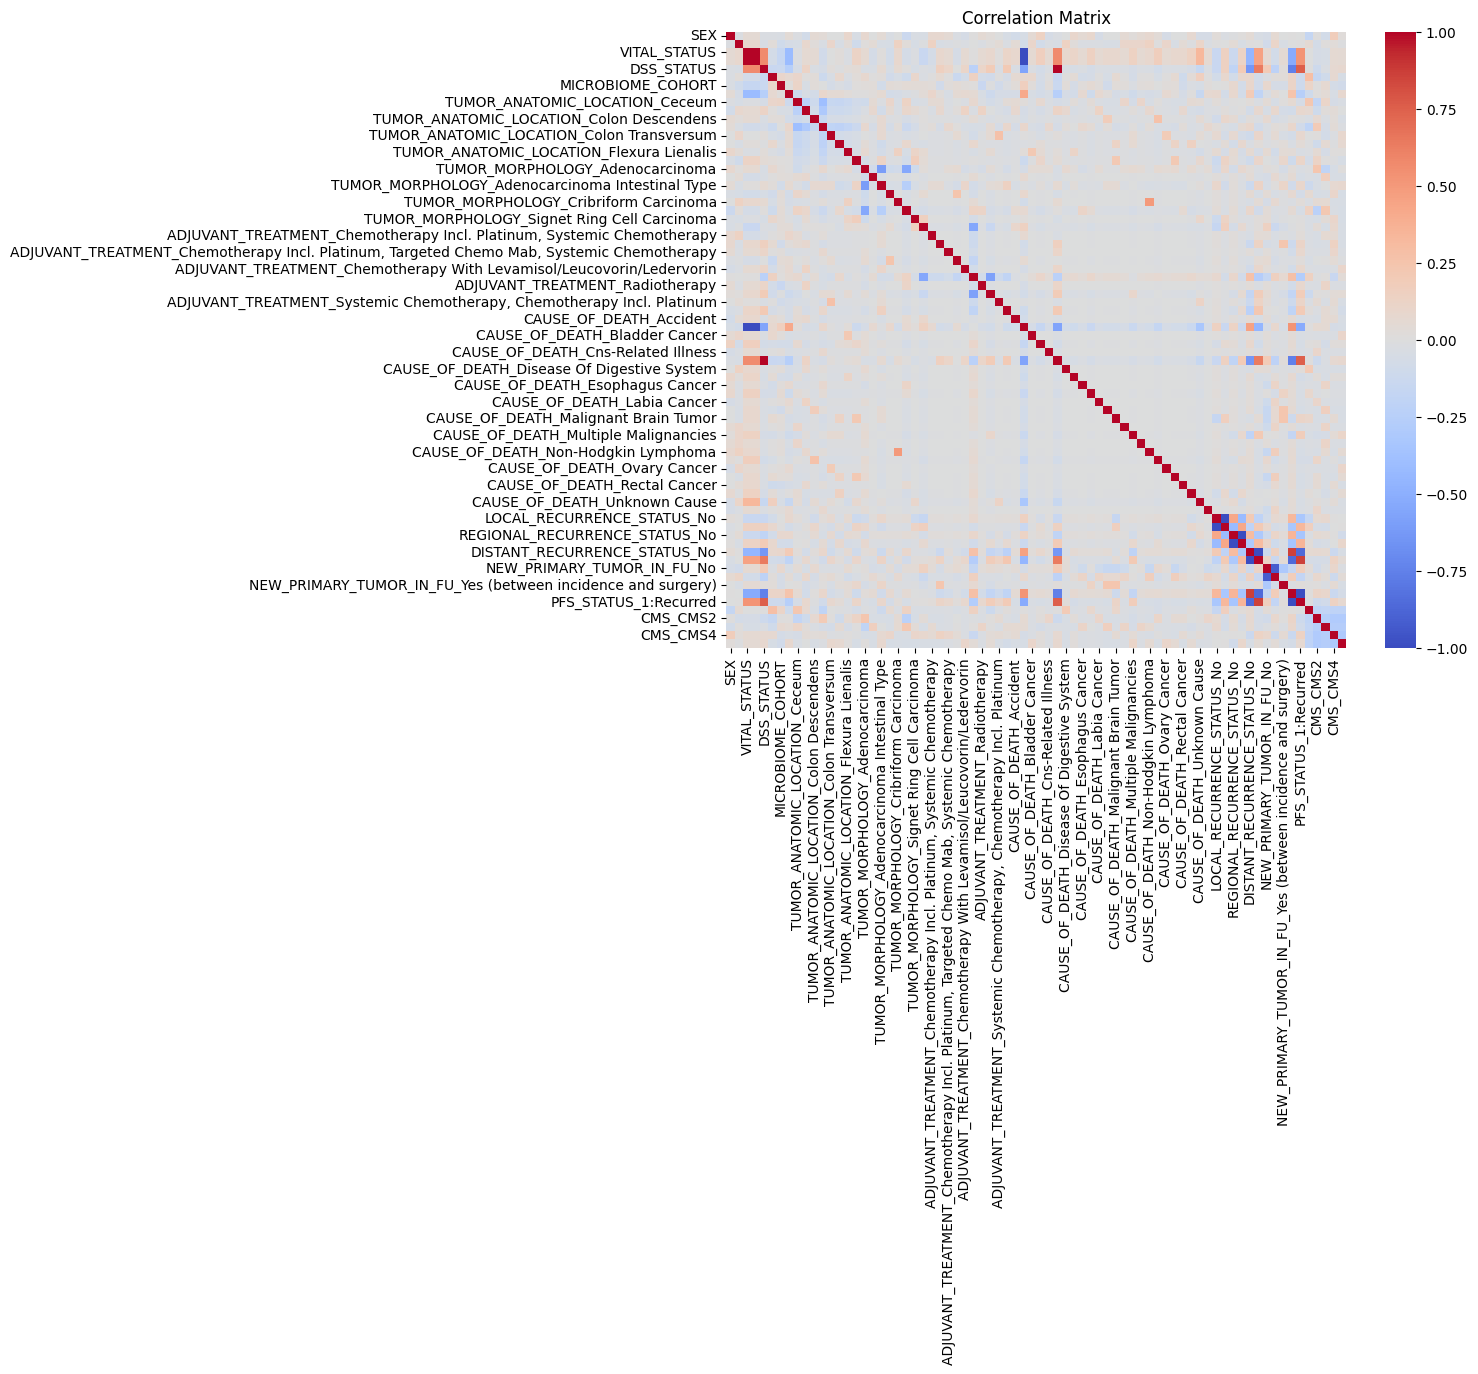

In [80]:
# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [81]:
dtype_counts = encoded_df.dtypes.value_counts()
print(dtype_counts)

bool     66
int64     8
Name: count, dtype: int64


#### find the most correlated features with columns:'LOCAL_RECURRENCE_STATUS', ''REGIONAL_RECURRENCE_STATUS', 'DISTANT_RECURRENCE_STATUS'. 
#### Those will be the categorical columns which we will further consider during prediction

In [82]:
# Find columns with null values dynamically
columns_with_nulls = encoded_df.columns[encoded_df.isnull().any()]

# Function to get correlated features
def get_correlated_features(target, threshold=0.4):
    correlated_features = correlation_matrix[target].abs()
    correlated_features = correlated_features[correlated_features > threshold]
    correlated_features = correlated_features.drop(target)
    return correlated_features.sort_values(ascending=False)

# Correlated features for LOCAL_RECURRENCE_STATUS
list_LOCAL_RECURRENCE_STATUS_Yes = get_correlated_features('LOCAL_RECURRENCE_STATUS_Yes')
list_LOCAL_RECURRENCE_STATUS_No = get_correlated_features('LOCAL_RECURRENCE_STATUS_No')

# List 2: Correlated features for REGIONAL_RECURRENCE_STATUS
list_REGIONAL_RECURRENCE_STATUS_Yes = get_correlated_features('REGIONAL_RECURRENCE_STATUS_Yes')
list_REGIONAL_RECURRENCE_STATUS_No = get_correlated_features('REGIONAL_RECURRENCE_STATUS_No')


# List 3: Correlated features for DISTANT_RECURRENCE_STATUS
list_DISTANT_RECURRENCE_STATUS_Yes = get_correlated_features('DISTANT_RECURRENCE_STATUS_Yes')
list_DISTANT_RECURRENCE_STATUS_No = get_correlated_features('DISTANT_RECURRENCE_STATUS_No')


# Convert to lists
list1 = list_LOCAL_RECURRENCE_STATUS_Yes.index.tolist()
list2 = list_LOCAL_RECURRENCE_STATUS_No.index.tolist()
list3 = list_REGIONAL_RECURRENCE_STATUS_Yes.index.tolist()
list4 = list_REGIONAL_RECURRENCE_STATUS_No.index.tolist()
list5 = list_DISTANT_RECURRENCE_STATUS_Yes.index.tolist()
list6 = list_DISTANT_RECURRENCE_STATUS_No.index.tolist()
# Output the lists
print("List 1: Correlated features for LOCAL_RECURRENCE_STATUS_Yes with correlation score > 0.4")
print(list1)
print("\nList 2: Correlated features for LOCAL_RECURRENCE_STATUS_No with correlation score > 0.4")
print(list2)
print("\nList 3: Correlated features for REGIONAL_RECURRENCE_STATUS_Yes with correlation score > 0.4")
print(list3)

print("List 1: Correlated features for REGIONAL_RECURRENCE_STATUS_No with correlation score > 0.4")
print(list4)
print("\nList 2: Correlated features for DISTANT_RECURRENCE_STATUS_Yes with correlation score > 0.4")
print(list5)
print("\nList 3: Correlated features for DISTANT_RECURRENCE_STATUS_No with correlation score > 0.4")
print(list6)

# Combine all the lists
combined_list = set(list1 + list2 + list3 + list4 + list5 + list6)

# Check for columns with null values in the combined list
nulls_in_combined_list = [col for col in columns_with_nulls if col in combined_list]

# Output the columns with null values that are also in the combined list
print("\nColumns with null values that are also in the correlated features lists:")
print(nulls_in_combined_list)


List 1: Correlated features for LOCAL_RECURRENCE_STATUS_Yes with correlation score > 0.4
['LOCAL_RECURRENCE_STATUS_No', 'REGIONAL_RECURRENCE_STATUS_No', 'REGIONAL_RECURRENCE_STATUS_Yes']

List 2: Correlated features for LOCAL_RECURRENCE_STATUS_No with correlation score > 0.4
['LOCAL_RECURRENCE_STATUS_Yes', 'REGIONAL_RECURRENCE_STATUS_No', 'REGIONAL_RECURRENCE_STATUS_Yes']

List 3: Correlated features for REGIONAL_RECURRENCE_STATUS_Yes with correlation score > 0.4
['REGIONAL_RECURRENCE_STATUS_No', 'LOCAL_RECURRENCE_STATUS_No', 'LOCAL_RECURRENCE_STATUS_Yes']
List 1: Correlated features for REGIONAL_RECURRENCE_STATUS_No with correlation score > 0.4
['REGIONAL_RECURRENCE_STATUS_Yes', 'LOCAL_RECURRENCE_STATUS_No', 'LOCAL_RECURRENCE_STATUS_Yes']

List 2: Correlated features for DISTANT_RECURRENCE_STATUS_Yes with correlation score > 0.4
['DISTANT_RECURRENCE_STATUS_No', 'PFS_STATUS_1:Recurred', 'PFS_STATUS_0:DiseaseFree', 'DSS_STATUS', 'CAUSE_OF_DEATH_Colon Cancer', 'VITAL_STATUS', 'OS_STATUS'

In [83]:
encoded_df.columns.T

Index(['SEX', 'HISTORY_OF_CANCER', 'VITAL_STATUS', 'OS_STATUS', 'DSS_STATUS',
       'ICR_HML', 'MICROBIOME_COHORT', 'MBR_GROUP',
       'TUMOR_ANATOMIC_LOCATION_Ceceum',
       'TUMOR_ANATOMIC_LOCATION_Colon Ascendens',
       'TUMOR_ANATOMIC_LOCATION_Colon Descendens',
       'TUMOR_ANATOMIC_LOCATION_Colon Sigmoideum',
       'TUMOR_ANATOMIC_LOCATION_Colon Transversum',
       'TUMOR_ANATOMIC_LOCATION_Flexura Hepatica',
       'TUMOR_ANATOMIC_LOCATION_Flexura Lienalis',
       'TUMOR_ANATOMIC_LOCATION_Rectosigmoideum',
       'TUMOR_MORPHOLOGY_Adenocarcinoma',
       'TUMOR_MORPHOLOGY_Adenocarcinoma In Villeus Adenoma',
       'TUMOR_MORPHOLOGY_Adenocarcinoma Intestinal Type',
       'TUMOR_MORPHOLOGY_Adenocarcinoma With Mixed Subtypes',
       'TUMOR_MORPHOLOGY_Cribriform Carcinoma',
       'TUMOR_MORPHOLOGY_Mucineus Adenocarcinoma',
       'TUMOR_MORPHOLOGY_Signet Ring Cell Carcinoma',
       'ADJUVANT_TREATMENT_Chemotherapy Incl. Platinum',
       'ADJUVANT_TREATMENT_Chemotherapy 

## encoded_df = 'one hot encoding' and 'label encoding' of (new_df - new_df['PATIENT_ID'])

In [84]:
encoded_df.isna().sum().sum()

0

In [85]:
encoded_df.shape

(348, 74)

# Now we have a clean good dataframe with CATEGORICAL VALUES.

# NUMERICAL VALUE/ CONTINUOS VALUES

In [86]:
# Select columns that do not have the data type 'object'
non_object_df = joined_mutation_df.select_dtypes(exclude=['object'])

# Ensure 'PATIENT_ID' is included in the DataFrame
if 'PATIENT_ID' in joined_mutation_df.columns:
    non_object_df['PATIENT_ID'] = joined_mutation_df['PATIENT_ID']

# Iterate through the non-object columns and print column names and unique values
for column in non_object_df.columns:
    unique_values = joined_mutation_df[column].nunique()
    print(f"Column: {column}, Unique Values: {unique_values}")



Column: PATIENT_ID, Unique Values: 348
Column: PATH_TUMOR_STAGE, Unique Values: 4
Column: PATH_NODES_STAGE, Unique Values: 3
Column: PATH_METASTASIS_STAGE, Unique Values: 2
Column: AJCC_PATH_STAGE, Unique Values: 4
Column: CLINICAL_N_STAGE, Unique Values: 3
Column: CLINICAL_M_STAGE, Unique Values: 2
Column: CLINICAL_STAGE, Unique Values: 4
Column: AGE_AT_DX, Unique Values: 55
Column: OS_MONTHS, Unique Values: 333
Column: DSS_MONTHS, Unique Values: 307
Column: PFS_MONTHS, Unique Values: 330
Column: ICRSCORE, Unique Values: 348
Column: MBR_SCORE, Unique Values: 288
Column: MICROSCORE, Unique Values: 2
Column: TMB_NONSYNONYMOUS, Unique Values: 177
Column: Mutation_Count, Unique Values: 174


In [87]:
non_object_df['PATIENT_ID'].head().T

0    0
1    1
2    2
3    3
4    4
Name: PATIENT_ID, dtype: int64

In [88]:
for column in non_object_df.columns:
    null_values = joined_mutation_df[column].isnull().sum().sum()
    print(f"Column: {column}, Null Values: {null_values}")

Column: PATIENT_ID, Null Values: 0
Column: PATH_TUMOR_STAGE, Null Values: 0
Column: PATH_NODES_STAGE, Null Values: 0
Column: PATH_METASTASIS_STAGE, Null Values: 23
Column: AJCC_PATH_STAGE, Null Values: 0
Column: CLINICAL_N_STAGE, Null Values: 0
Column: CLINICAL_M_STAGE, Null Values: 0
Column: CLINICAL_STAGE, Null Values: 209
Column: AGE_AT_DX, Null Values: 0
Column: OS_MONTHS, Null Values: 0
Column: DSS_MONTHS, Null Values: 28
Column: PFS_MONTHS, Null Values: 0
Column: ICRSCORE, Null Values: 0
Column: MBR_SCORE, Null Values: 60
Column: MICROSCORE, Null Values: 81
Column: TMB_NONSYNONYMOUS, Null Values: 67
Column: Mutation_Count, Null Values: 67


### Correlation between DISTANT_RECURRENCE_STATUS, LOCAL_RECURRENCE_STATUS and REGIONAL_RECURRENCE_STATUS of encoded_df with the non_object_df


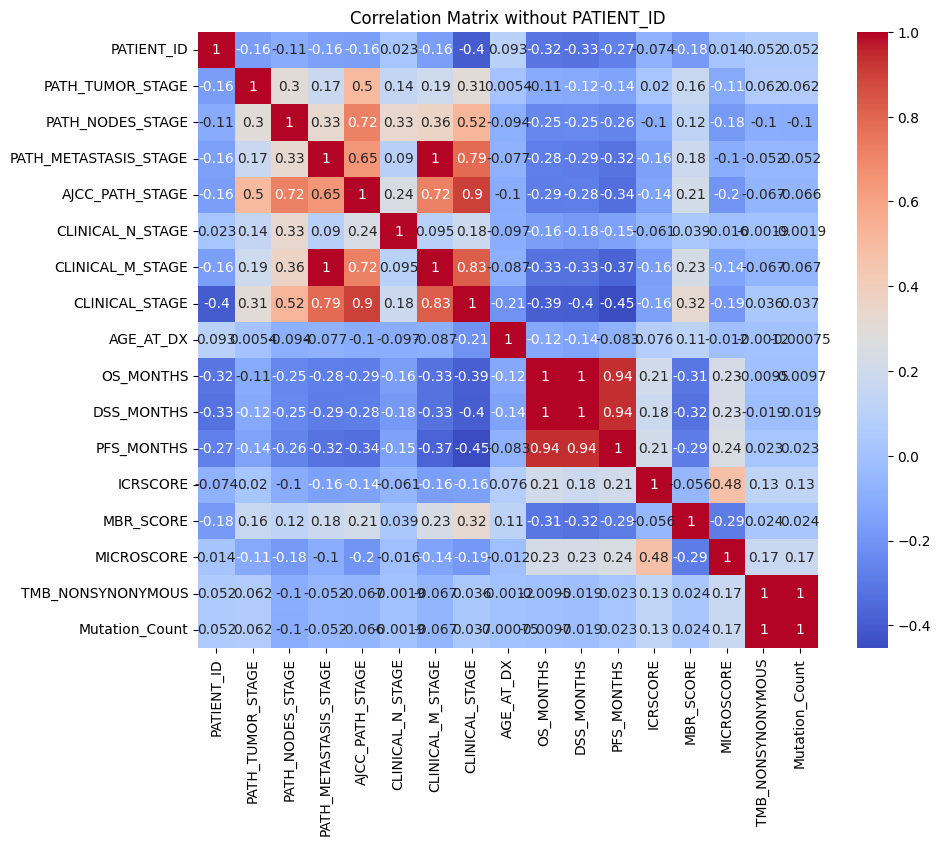

In [89]:
# Compute the correlation matrix
correlation_matrix_non_obj = non_object_df.corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_non_obj, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix without PATIENT_ID')
plt.show()

In [90]:
# Identify columns with null values
columns_with_nulls = [col for col in encoded_df.columns if encoded_df[col].isnull().any()]

# Check for columns with null values in the combined list
nulls_in_combined_list = [col for col in columns_with_nulls if col in combined_list]

# Determine which columns to drop: those with null values that are not in the combined list
columns_to_drop = [col for col in columns_with_nulls if col not in nulls_in_combined_list]

# Check the remaining columns
print("Columns with null values that were retained:", nulls_in_combined_list)


for i in columns_to_drop:
    x=encoded_df[i].head(3)
    y=encoded_df[i].nunique()
    print(f'{i} --> {x}')
    print(f'{i} --> {y}')
    print('--------------------------------------------------------------------------------------------------')

Columns with null values that were retained: []


In [91]:
non_object_df.isnull().sum().sum()

535

In [92]:
null_counts = non_object_df.isnull().sum()

columns_with_nulls = null_counts[null_counts > 0]

print(columns_with_nulls)

PATH_METASTASIS_STAGE     23
CLINICAL_STAGE           209
DSS_MONTHS                28
MBR_SCORE                 60
MICROSCORE                81
TMB_NONSYNONYMOUS         67
Mutation_Count            67
dtype: int64


In [93]:
non_object_df.drop("CLINICAL_STAGE", axis = 1, inplace= True)

In [94]:
# Get a series with the count of null values for each column in non_object_df
null_counts_non_object = non_object_df.isnull().sum()

# Filter out columns with no null values
columns_with_nulls_non_object = null_counts_non_object[null_counts_non_object > 0]

# Get the list of columns with null values
columns_with_nulls_non_object_list = columns_with_nulls_non_object.index.tolist()

# Display the list of columns
print(columns_with_nulls_non_object_list)

['PATH_METASTASIS_STAGE', 'DSS_MONTHS', 'MBR_SCORE', 'MICROSCORE', 'TMB_NONSYNONYMOUS', 'Mutation_Count']


In [95]:
for column in columns_with_nulls_non_object_list:
    mode_value = non_object_df[column].mode()[0]  # Get the mode of the column
    non_object_df[column].fillna(mode_value, inplace=True)  # Replace null values with the mode


/var/folders/65/hnv0c_w96gqfc4073czdj8_w0000gn/T/ipykernel_5242/639380706.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  non_object_df[column].fillna(mode_value, inplace=True)  # Replace null values with the mode


In [96]:
non_object_df.isnull().sum().sum()

0

In [97]:
concatenated_df = pd.concat([encoded_df, non_object_df], axis = 1)

In [98]:
concatenated_df.head

<bound method NDFrame.head of      SEX  HISTORY_OF_CANCER  VITAL_STATUS  OS_STATUS  DSS_STATUS  ICR_HML  \
0      0                  0             1          1           1        0   
1      1                  0             1          1           1        0   
2      1                  0             1          1           0        2   
3      0                  1             0          0           0        1   
4      0                  0             1          1           1        1   
..   ...                ...           ...        ...         ...      ...   
343    1                  0             0          0           0        2   
344    0                  0             1          1           0        1   
345    1                  0             1          1           0        1   
346    0                  0             0          0           0        2   
347    1                  0             0          0           0        1   

     MICROBIOME_COHORT  MBR_GROUP  TUMOR_ANAT

In [99]:
print("Shape of concatenated DataFrame:", concatenated_df.shape)

Shape of concatenated DataFrame: (348, 90)


In [100]:
file_path = "preprocessed_joined_df.csv"
concatenated_df.to_csv(file_path, index=False)